# Linear classifier implementations
In this notebook I have implemented the following:
* Generated a 200-size dataset - 2 sets of 2D points, each is normally distributed (labeled 1/-1)
* Perceptron - Batch & Stochastic
* Demostra

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import time
%matplotlib inline
from IPython.display import display, clear_output
# %matplotlib notebook


First, let's create our dataset:

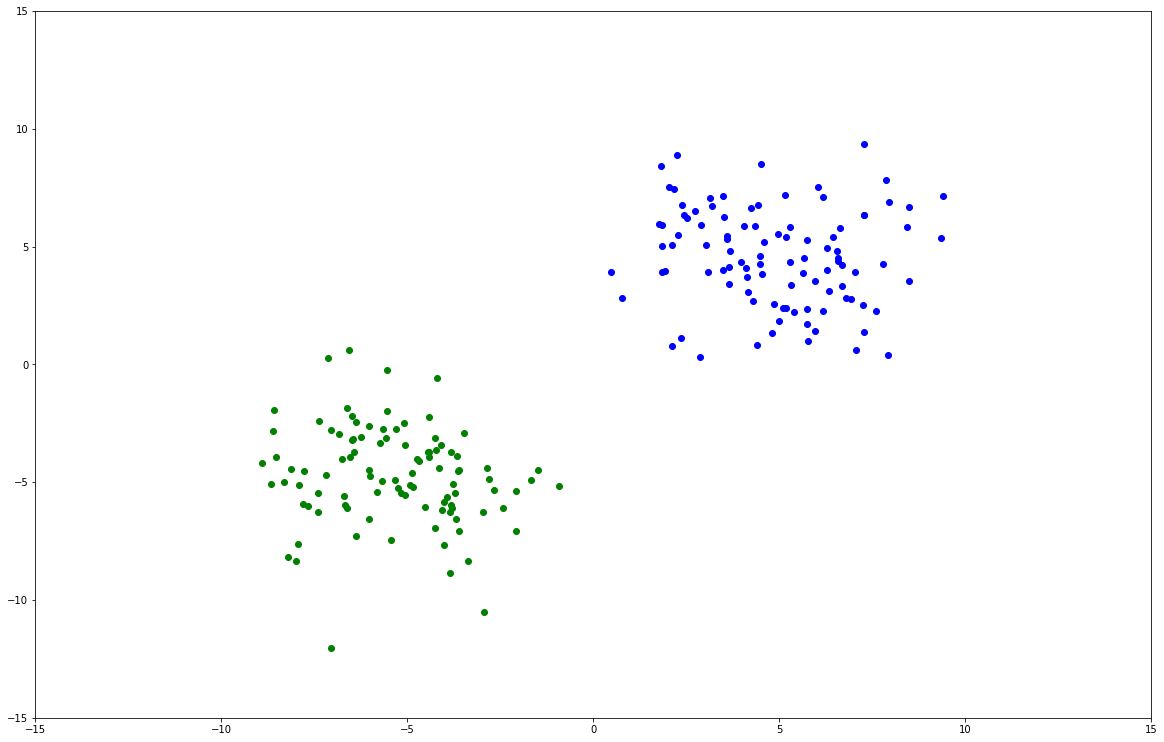

In [2]:
# generating 2 normal disterbuted classes
class_A = np.concatenate((np.random.normal(5, 2, 100).reshape(100, -1),
                          np.random.normal(5, 2, 100).reshape(100, -1),
                          np.ones(100).reshape(100, -1)), axis=1)
class_B = np.concatenate((np.random.normal(-5, 2, 100).reshape(100, -1),
                          np.random.normal(-5, 2, 100).reshape(100, -1),
                          (np.ones(100).reshape(100, -1)) * -1), axis=1)

# concatenate and shuffle
dataset_2d = np.concatenate((class_A, class_B))
np.random.shuffle(dataset_2d)

pd.DataFrame(dataset_2d, columns=['x', 'y', 'class']).describe()

X = dataset_2d[:,:-1]
y = dataset_2d[:,-1]


def show_plot(dataset_2d, thetas=None, p=None):
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (20,13)
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    class_A = dataset_2d[dataset_2d[:,2] == 1]
    class_B = dataset_2d[dataset_2d[:,2] == -1]
    plt.scatter(class_A[:,0], class_A[:,1], color='blue')
    plt.scatter(class_B[:,0], class_B[:,1], color='green')
    if not thetas is None:
        x = np.linspace(-15, 15, 2)
        y = (-thetas[0]*x - thetas[2]) / thetas[1]
        plt.plot(x, y, color='red')
    if not p is None:
        plt.plot(p[0], p[1], 'r*')
    clear_output(wait = True)
    plt.pause(0.01)
    plt.show()


show_plot(dataset_2d)

# The Perceptron Algorithm
The Perceptron is an algorithm for supervised learning of binary classifiers, based on a linear predictor function combining a set of weights with the feature vector.

For a given linearly seperabale dataset, the perceptron algorithm will ALWAYS find a sample-consistent classifier.

Consider a dataset of $m$ instences and $n$ features and let $w\in \mathbb{R}^n$ be the weight vector and $b$ the bias.<br>
The execution a algorithm will be:
$$f\left(\overrightarrow{x}\right)=\begin{cases}1 & \overrightarrow{w}\cdot \overrightarrow{x}+b\ge0\\-1 & \overrightarrow{w}\cdot \overrightarrow{x}+b<0\end{cases}$$
Where $\overrightarrow{w}\cdot \overrightarrow{x}$ is the dot product $\sum _{i=1} ^n w_i \cdot x_i$
note: the bias shifts the decision boundary away from the origin and does not depend on any input value.<br><br>
In our case, the classifier will be of the form: $$w_0 x + w_1 y + b = 0$$
So $n=2$ and $m=200$. Let's implement.


In [3]:
def predict(x, w, b):
    return 1 if w @ x + b >= 0 else -1

## Learning proccess
We will implement two different teqnuiue of learning. Stochastic and Batch.<br>
First, let us initialize essential parameters:

In [4]:
def initialize_thetas(random=False):
    # where theta is the vector weights t1,t2,t3 of the linear line t1*x + t2*y + t3*b = 0
    if random:
        thetas = np.random.uniform(low=-1, high=1, size=(3,))
    else:
        thetas = np.array([-1,1,1]).astype('float64')

    return thetas


thetas = initialize_thetas()

# set learning rate
lr_stochastic = .01
lr_batch = .0006


note that our weight vector $w$ is defined as $\Theta$, including the bias which is $\Theta_2$.

## Stochastic Perceptron
This technique evaluates and updates the weights every iteration.

The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, and will be updated if it is misclassified.<br>

Basically, the learning process will be:<br><br>
Initialize $w$ randomly<br>
Repeat until convergence/fixed number of iterations:<br>

&emsp; Foreach $x^{(d)}\in X$<br>
&emsp;&emsp; $o^{(d)} = sgn(w\cdot x^{(d)} + b)$<br>
&emsp;&emsp; Foreach $w_i\in w$ update:<br>
&emsp;&emsp;&emsp; $w_i = w_i -\eta (o^{(d)} - t^{(d)})\cdot x_i^{(d)}$<br>
&emsp;&emsp;&emsp; $b = -\eta (o^{(d)} - t^{(d)})$<br>

Where $\eta$ is the learning rate, $o^{(d)}$ is the prediction of instance $x^{(d)}$ with target/label $t^{(d)} \in \{-1,1\}$.<br><br>
Note that if the prediction is corrent, then $o^{(d)} - t^{(d)} = 0$, so no change of weights. <br>
If not, the classfier needs to be updated towards the sign of $(o^{(d)} - t^{(d)})$.




Our dataset consisted of 2 classes detributed normally each. Setting a descent learning rate, we can find the classifier iterating a few times over each instance.<br>
Initializing our weight vector $w$ to [-1,1,1] (defined as $\Theta$).<br><br>
reminder: our linear line is of the form $\Theta_0 x + \Theta_1 y + \Theta_2 b = 0$

In [5]:
# stochastic perceptron

thetas = initialize_thetas()
iterations = 5

def stochastic_perceptron(thetas, iterations):
    for i in range(iterations):
        for row in list(zip(X,y)):
            p = row[0]
            t = row[1]
            thetas = update_single_point(p, t, thetas, lr_stochastic)
            show_plot(dataset_2d, thetas, p)
    print('final thetats:', thetas)
            
        

def update_single_point(p, t, thetas, lr):
    """
    updates thetas related to an instance p
    """
    update_value = predict(p, thetas[:-1], thetas[-1]) - t # either -1, 0 (if classified correctly), or 1
    thetas[:-1] -= lr * p * update_value
    thetas[-1] -= lr * update_value # update bias
    
    return thetas


# stochastic_perceptron(thetas, iterations)

Note: running time is slow due to plotting for every instance. Can be improved easily by filtering only misclassifications.

## Batch Perceptron
In batch learning the model update is performed after observing the entire training set.
The learning algorithm in our case will be:<br><br>
Initialize $w$ randomly<br>
Repeat until convergence/fixed number of iterations:<br>
&emsp; Foreach $x^{(d)}\in X$<br>
&emsp;&emsp;&emsp; $o^{(d)} = sgn(w\cdot x^{(d)} + b)$<br>
&emsp;&emsp;&emsp; Foreach $w_i\in w$ update:<br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\Delta w_i = -\eta \sum_{d\in D}(o^{(d)} - t^{(d)})\cdot x_i^{(d)}$<br>
&emsp;&emsp;&emsp; $b = -\eta \sum_{d\in D}(o^{(d)} - t^{(d)})$<br>
&emsp;&emsp;&emsp; $w = w + \Delta w$<br>

Let's implement:

In [6]:
# batch perceptron

thetas = initialize_thetas()
iterations = 100

def batch_perceptron(thetas, iterations):
    show_plot(dataset_2d, thetas)
    for i in range(iterations):
        thetas = update_thetas(X, y, thetas, lr_batch)
#         print(thetas)
        show_plot(dataset_2d, thetas)
    print('final thetas:', thetas)
    
    
def update_thetas(X, y, thetas, lr):
    thetas += np.apply_along_axis(lambda row: get_delta_theta(row, thetas, lr), 1, dataset_2d).sum(axis=0)
    return thetas


def get_delta_theta(row, thetas, lr):
    p = np.array(row[:-1])
    t = row[2]
    delta_theta = np.zeros(3)
    update_value = predict(p, thetas[:-1], thetas[-1]) - t # either -1, 0 (if classified correctly), or 1
    delta_theta[:-1] -= lr*p[:-1]*update_value
    delta_theta[-1] -= lr*update_value # update bias
    
    return delta_theta

# batch_perceptron(thetas, iterations)

## The Dual Perceptron
In order to derive a kernelized version of the perceptron algorithm (shall be explained in details later), we must first formulate it in dual form.<br>
As mentioned before, the decision function is: $$C(\overrightarrow{x}) = sgn \left(\overrightarrow{w}\cdot \overrightarrow{x} + b\right) = sgn \left( \left(\sum _{i=1} ^n w_i \cdot x_i\right) + b\right)$$
Where for every iteration over $x_{id}$: $$\overrightarrow{w_i} = w_{i}-\eta\left(o_{d}-t_{d}\right)\cdot x_{id}$$
To simplefy, every iteration we add a small fraction of $t_d\cdot x_d$ if it is misclassified (we multiply by $t_d$ to set the sign).<br>
Let $\alpha_d$ be the $\left((number\, of\, misclassifications) \times \eta\right)$ of instance $x_d$ during the learning proccess.<br>
So we get:
$$\overrightarrow{w}\cdot \overrightarrow{x} =
\left(\sum_{x_d\in X} \alpha_d t_d \overrightarrow{x_d}\right) \cdot \overrightarrow{x}=
\sum_{x_d\in X} \alpha_d t_d \left(\overrightarrow{x_d} \cdot \overrightarrow{x}\right)$$

So the duel perceptron algorithm would be:<br><br>
Initialize for all $1\le i\le m, \alpha_i = 0$<br>
Repeat until convergence/fixed number of iterations:<br>
&emsp; Foreach $x^{(d)}\in X$<br>
&emsp;&emsp;&emsp; $o_d = \sum_{i=1} ^m \alpha_i t_i \left(\overrightarrow{x_i} \cdot \overrightarrow{x_d}\right)$<br>
&emsp;&emsp;&emsp; If $o_dt_d < 0$ update: // a misclassification<br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\alpha_d = \alpha_d + \eta$<br><br>

To conclude, for a given new instance $\overrightarrow{x}$, the decision function will be:
$$C\left(\overrightarrow{x}\right)=\sum_{x_d\in X}\alpha_{i}t_{i}\left(\overrightarrow{x}\cdot\overrightarrow{x_{d}}\right)$$
Let's implement:

In [7]:
np.arange(3) @ np.arange(3)

5

In [209]:
# init eta and numbert of interations
eta = .01
iterations = 5

def dual_perceptron(data, iterations=5):
    alphas = np.zeros(data.shape[0] + 1) # init alphas vector
    for i in range(iterations):
        delta_alphas = np.zeros(data.shape[0] + 1)
        for j in range(data.shape[0]):
            target = data[j][-1]
#             print(target)
            prediction = predict_dual(data[j][:-1], alphas, data)
#             print(prediction, target)
            if prediction * target < 0:
                delta_alphas[j] += eta
                delta_alphas[-1] += eta
        alphas += delta_alphas
    return alphas
            
def predict_dual(x, alphas, data):
#     print((alphas * data[:,-1] * (data[:,:-1] @ x)).sum())
    return 1 if (alphas[:-1] * data[:,-1] * (data[:,:-1] @ x)).sum() + alphas[-1] >= 0 else -1

alphas = dual_perceptron(dataset_2d, iterations)

In [210]:
alphas

array([0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01,
       0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.01, 0.  ,
       0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01,
       0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.  , 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.01,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.01,
       0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01,
       0.01, 0.  , 0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.01, 0.01, 0.  , 0.  , 0.01, 0.01, 0.

In [211]:
# test
train = dataset_2d[:-30]
test = dataset_2d[-30:]

alphas = dual_perceptron(train, iterations)

correct_pred = 0
for x in test:
    print(x[2] - predict_dual(x[:-1], alphas, train))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [205]:
# test
alphas = dual_perceptron(dataset_2d, iterations)

correct_pred = 0
for x in dataset_2d:
    correct_pred += x[2] == predict_dual(x[:-1], alphas, dataset_2d)
print('accuracy rate:', correct_pred / dataset_2d.shape[0])

accuracy rate: 1.0


# The Kernel Perceptron
What if our data is not linearly seperable?
Consider the following detribution of this 2-class dataset:

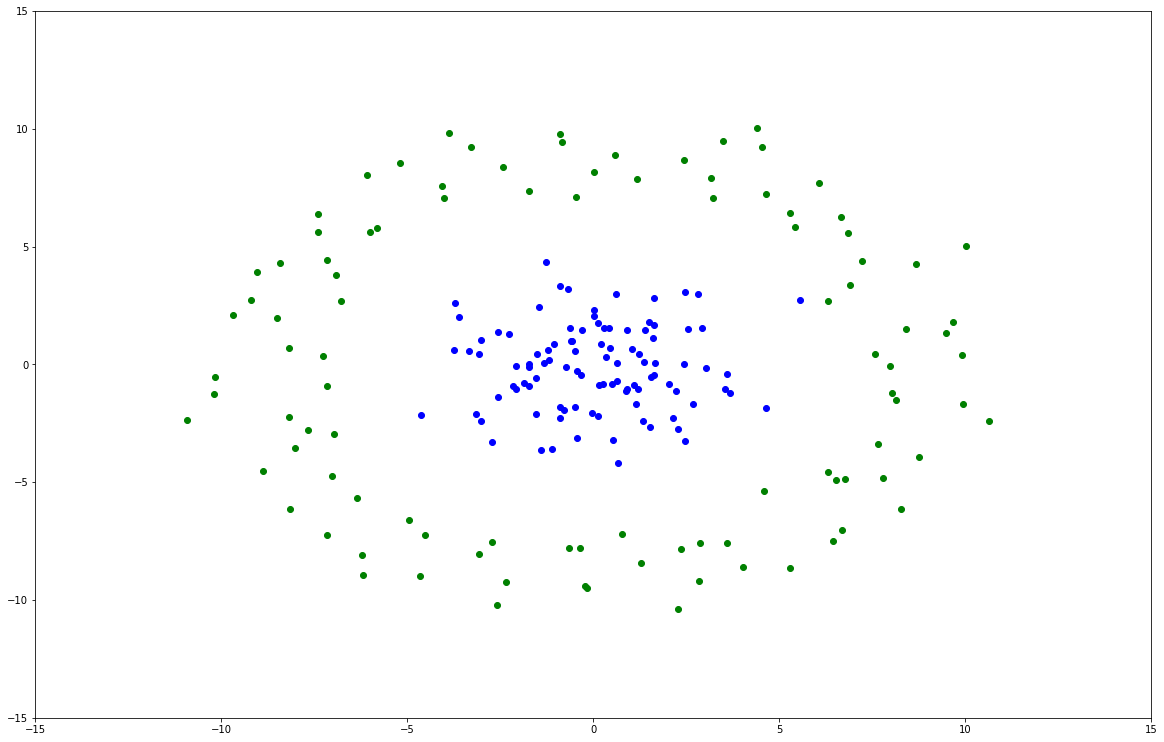

In [93]:
from sklearn.datasets import make_circles

# generating 2 new classes
class_C = np.concatenate((np.random.normal(0, 2, 100).reshape(100, -1),
                          np.random.normal(0, 2, 100).reshape(100, -1),
                          np.ones(100).reshape(100, -1)), axis=1)

class_D = np.concatenate((make_circles(n_samples=100, noise=.05)[0] * 10, (np.ones(100).reshape(100, -1) * -1)), axis=1)

# concatenate and shuffle
dataset_circles = np.concatenate((class_C, class_D))
np.random.shuffle(dataset_circles)

# pd.DataFrame(mat, columns=['x', 'y', 'class']).describe()

X = dataset_circles[:,:-1]
y = dataset_circles[:,-1]

show_plot(dataset_circles)

Clearly this dataset is not linearly seperable. How can we manipulate the data and make it lineanrly seperable? Our data is in $\mathbb{R}^2$. Maybe it is linearly seperable in a higher dimension. How about $\mathbb{R}^3$?<br>
Let $\varphi: \mathbb{R}^2\rightarrow\mathbb{R}^3$ be the following linear mapping: $$\varphi({x_1,x_2})=(x_1,x_2,x_1^2 + x_2^2)$$
Let's implement:

In [94]:
def phi(dataset_circles):
    third = np.power(dataset_circles[:,0], 2) + np.power(X[:,1], 2)
    return np.concatenate((dataset_circles[:,:2], third.reshape(200, -1), dataset_circles[:,-1].reshape(200, -1)), axis=1)

dataset_3d = phi(dataset_circles)

In order to denostrate, let's plot the 3d plot.<br>
Note that the drawn hyperplane is only for demonstration, hard-coded.

<IPython.core.display.Javascript object>


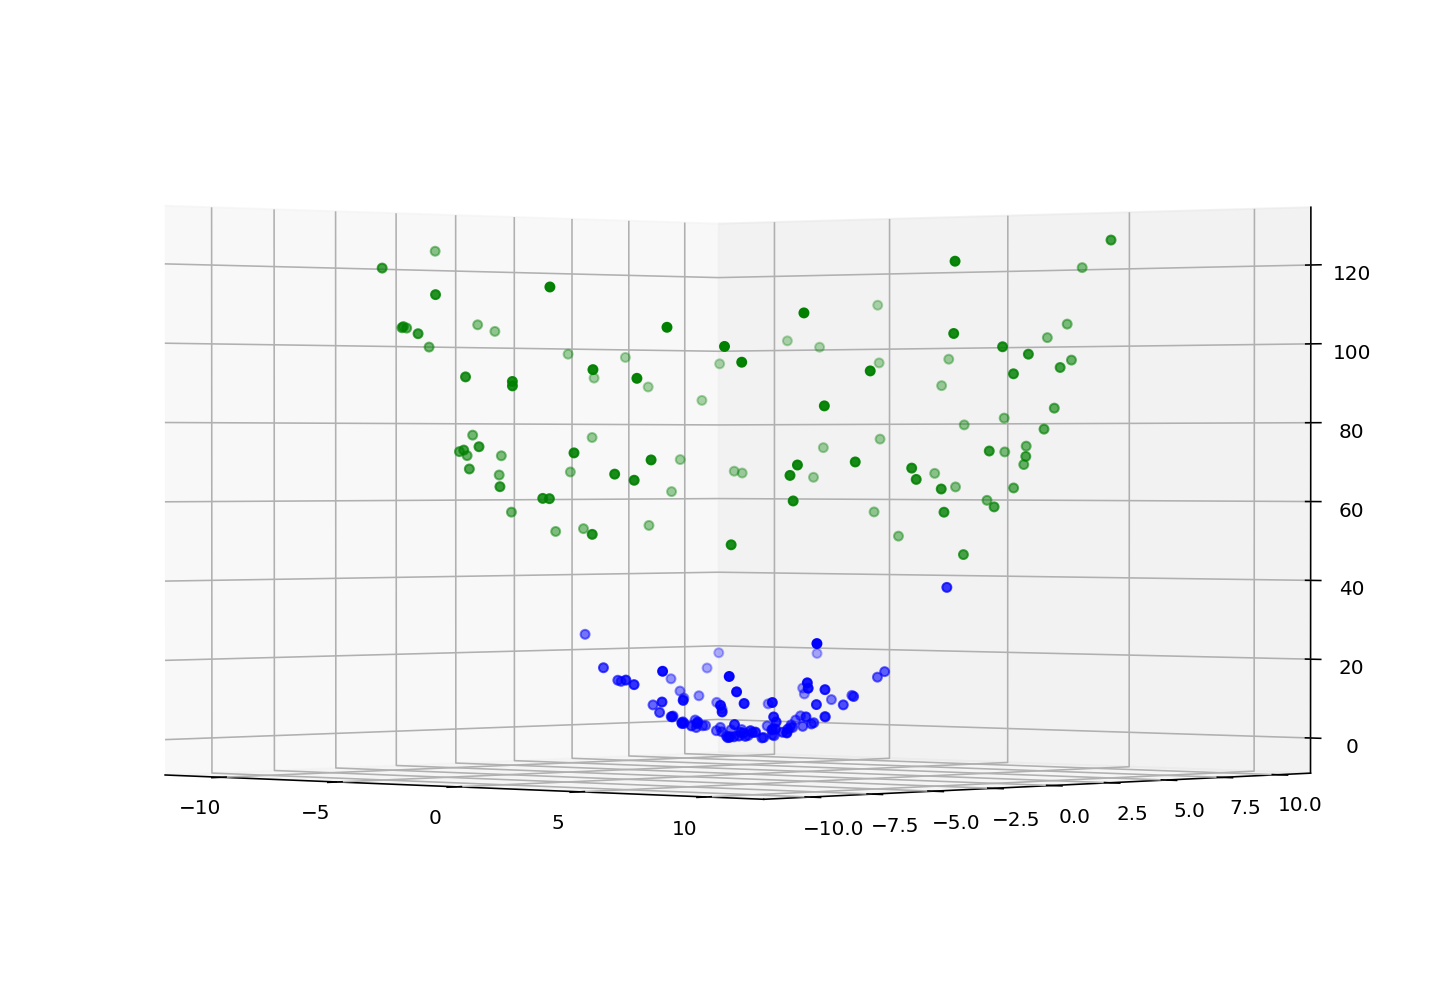

In [95]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3d(dataset_mapped):
    %matplotlib notebook
    ax = Axes3D(plt.figure(figsize=(10,7)))

    class_C = dataset_3d[dataset_3d[:,3] == 1]
    class_D = dataset_3d[dataset_3d[:,3] == -1]

#     x = np.arange(-10, 15, 5)
#     y = np.arange(-10, 15, 5)
#     Xi, Yi = np.meshgrid(x, y)
#     Zi = np.full((Xi.shape), 40)

    ax.scatter(class_C[:,0], class_C[:,1], class_C[:,2], color='blue')
    ax.scatter(class_D[:,0], class_D[:,1], class_D[:,2], color='green')
#     ax.plot_surface(Xi, Yi, Zi, color='grey')
    plt.show()

plot_3d(dataset_circles)

Using the duel form, we can now find a linear classifier in $\mathbb{R}^3$. the only difference will be in the decision function:
$$o_d = \sum_{i=1} ^m \alpha_i t_i \left(\overrightarrow{x_i} \cdot \overrightarrow{x_d}\right) \Longrightarrow o_d = \sum_{i=1} ^m \alpha_i t_i \left(\varphi\left(\overrightarrow{x_i}\right) \cdot \varphi\left(\overrightarrow{x_d}\right)\right)$$

In [219]:
new_data = dataset_3d
new_data[:,:2] = 0
alphas = dual_perceptron(dataset_3d, 100)
correct = 0
for x in dataset_3d:
#     print(predict_dual(x[:-1], alphas, new_data))
    correct += x[3] == predict_dual(x[:-1], alphas, dataset_3d)
print('acc:', correct / dataset_3d.shape[0])


acc: 1.0


In [190]:
alphas

array([ 82.,  82., 918., 918., 918., 918., 918., 918.,  82.,  82.,  82.,
       918.,  82.,  82.,  82.,  82., 918.,  82.,  82., 918., 918.,  82.,
        82., 918., 918.,  82.,  82., 918.,  82.,  82., 918.,  82., 918.,
        82.,  82., 918.,  82.,  82., 918.,  82., 918., 918.,  82.,  82.,
       918., 918., 918., 918., 918.,  82., 918.,  82., 918.,  82., 918.,
        82.,  82.,  82.,  82.,  82., 918.,  82.,  82., 918.,  82., 918.,
       918.,  82.,  82., 918.,  82., 918.,  82.,  82., 918.,  82.,  82.,
       918.,  82., 918., 918.,  82., 918.,  82.,  82., 918.,  82.,  82.,
       918., 918.,  82.,  82., 918.,  82., 918., 918., 918., 918.,  82.,
        82.,  82., 918.,  82., 918.,  82.,  82., 918.,  82., 918., 918.,
        82., 918., 918., 918., 918., 918., 918., 918., 918.,  82., 918.,
        82., 918.,  82.,  82., 918., 918., 918., 918.,  82.,  82.,  82.,
        82., 918.,  82., 918., 918.,  82.,  82.,  82.,  82.,  82., 918.,
        82., 918., 918., 918.,  82., 918.,  82., 91

## The Dual Perceptron
In order to derive a kernelized version of the perceptron algorithm, we must first formulate it in dual form.<br>
As mentioned before, the decision function is: $$C(\overrightarrow{x}) = sgn \left(\overrightarrow{w}\cdot \overrightarrow{x} + b\right) = sgn \left( \left(\sum _{i=1} ^n w_i \cdot x_i\right) + b\right)$$
Where for every iteration over $x_{id}$: $$\overrightarrow{w_i} = w_{i}-\eta\left(o_{d}-t_{d}\right)\cdot x_{id}$$
To simplefy, every iteration we add a small fraction of $t_d\cdot x_d$ if it is misclassified (we multiply by $t_d$ to set the sign).<br>
Let $\alpha_d$ be the number of misclassifications times $\eta$, of instance $x_d$ during the learning proccess.<br>
So we get:
$$\overrightarrow{w}\cdot \overrightarrow{x} =
\left(\sum_{x_d\in X} \alpha_d t_d \overrightarrow{x_d}\right) \overrightarrow{x}=
\sum_{x_d\in X} \alpha_d t_d \left(\overrightarrow{x_d} \cdot \overrightarrow{x}\right)$$

So the duel perceptron algorithm would be:<br><br>
Initialize for all $1\le i\le m, \alpha_i = 0$<br>
Repeat until convergence/fixed number of iterations:<br>
&emsp; Foreach $x^{(d)}\in X$<br>
&emsp;&emsp;&emsp; $o_d = \sum_{i=1} ^m \alpha_i t_i \left(\overrightarrow{x_i} \cdot \overrightarrow{x_d}\right)$<br>
&emsp;&emsp;&emsp; If $o_dt_d < 0$ update: // a misclassification<br>
&emsp;&emsp;&emsp;&emsp;&emsp; $\alpha_d = \alpha_d + \eta$<br><br>

To conclude, for a given new instance $\overrightarrow{x}$, the decision function will be:
$$C\left(\overrightarrow{x}\right)=\sum_{x_d\in X}\alpha_{i}t_{i}\left(\overrightarrow{x}\cdot\overrightarrow{x_{d}}\right)$$
Let's implement: